In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tftb
import scipy.signal as sig

from utils.preprocessing import load_data,center_data
from utils.plotting import plot_single, plot_setup

In [5]:
df = load_data('./data/Geo_Mag_Vari_Odessa_25-31_Jan_2018.txt')
df['y_centered'] = center_data(df.By)
myfigsize = (14,4)

c:\Users\Admin\diploma\utils\plotting.py:202: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


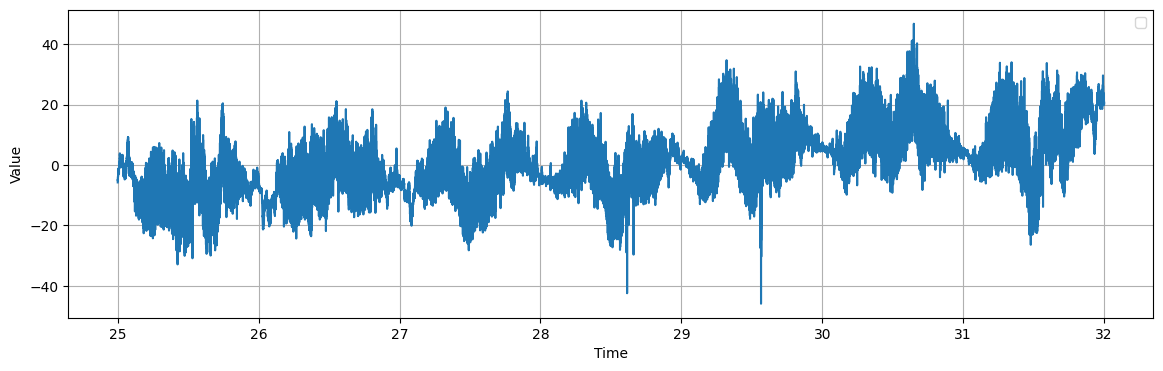

In [6]:
# dom = np.linspace(0,100, 500)
# x = np.random.rand(dom.shape[0])
plt.figure(figsize=myfigsize)
plt.plot(df.Time, df.y_centered)
plot_setup()

In [7]:
T = df.Time.to_numpy()[-1] - df.Time.to_numpy()[0]
dt = 1/(60*60*24)
freq_s = 1/dt  
domain = np.array(df.Time)[::2000]
signal = np.array(df.y_centered)[::2000]

<Figure size 1400x400 with 0 Axes>

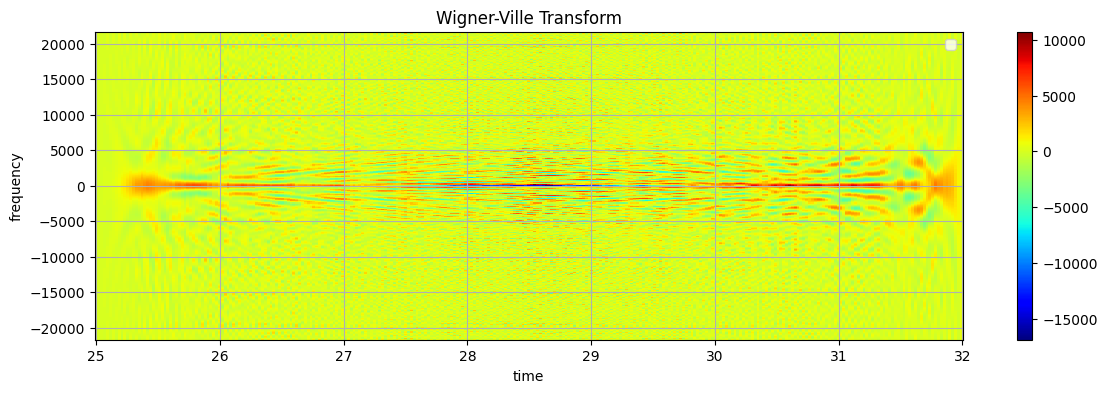

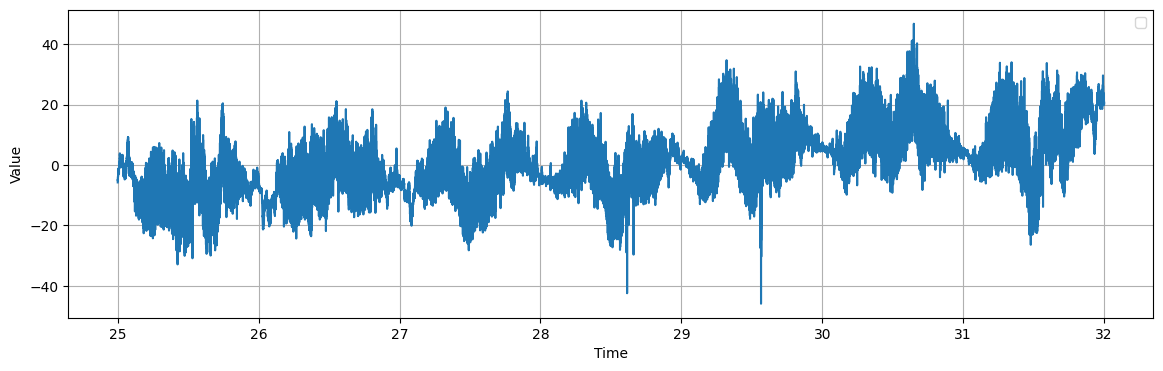

In [19]:
STFT_window = 2**6  # window size of the STFT
f_stft, t_stft, Zxx = sig.stft(signal, freq_s, nperseg=STFT_window,
                           noverlap=STFT_window-1, return_onesided=False)

Zxx = np.fft.fftshift(Zxx, axes=0)
f_stft = np.fft.fftshift(f_stft)

wvd = tftb.processing.WignerVilleDistribution(signal, timestamps=domain)
tfr_wvd, t_wvd, f_wvd = wvd.run()

plt.figure(figsize=myfigsize)
df1 = f_stft[1] - f_stft[0]  # the frequency step
# im = plt.imshow(np.real(Zxx * np.conj(Zxx)), aspect='auto',
#           interpolation=None, origin='lower',
#           extent=(domain[0] - dt/2, domain[-1] + dt/2,
#                   f_stft[0] - df1/2, f_stft[-1] + df1/2))
# plt.ylabel('frequency [Hz]')
# plt.colorbar(im)
# plt.title('spectrogram')
# plt.show()
 
# because of how they implemented WVT, the maximum frequency is half of
# the sampling Nyquist frequency, so 125 Hz instead of 250 Hz, and the sampling
# is 2 * dt instead of dt
plt.figure(figsize=myfigsize)
f_wvd = np.fft.fftshift(np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt))
df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT
# im = plt.imshow(np.fft.fftshift(tfr_wvd, axes=0), aspect='auto', origin='lower',
#        extent=(domain[0] - dt/2, domain[-1] + dt/2,
#                f_wvd[0]-df_wvd/2, f_wvd[-1]+df_wvd/2))
# plt.pcolormesh(np.linspace(domain[0] - dt/2, domain[-1] + dt/2, tfr_wvd.shape[1]), np.linspace(f_wvd[0] - df_wvd/2, f_wvd[-1] + df_wvd/2, tfr_wvd.shape[0]), np.fft.fftshift(tfr_wvd, axes=0), shading='auto', cmap='jet')
plt.pcolormesh(np.linspace(domain[0] - dt/2, domain[-1] + dt/2, tfr_wvd.shape[1]), np.linspace(f_wvd[0] - df_wvd/2, f_wvd[-1] + df_wvd/2, tfr_wvd.shape[0]), np.fft.fftshift(tfr_wvd, axes=0), shading='auto', cmap='jet')
plt.colorbar()
plot_setup(
        xlabel='time',
        ylabel='frequency',
        title='Wigner-Ville Transform'
)

plt.figure(figsize=myfigsize)
plt.plot(df.Time, df.y_centered)
plot_setup()